In [2]:
import pandas as pd
import numpy as np
import json

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## set up 

In [3]:
trial_data=pd.read_csv('data_files/eventseg_trialdata.csv',header=None)
question_data=pd.read_csv('data_files/eventseg_questiondata.csv',header=None)
event_data=pd.read_csv('data_files/eventseg_eventdata.csv',header=None)

In [4]:
exp2_subs=np.unique(question_data[584:][0]) # possible subjects that did this version of the study
print(len(exp2_subs))
print(exp2_subs)

# this subject lied or their data didn't register ... 
#subject_not_finish='5c540df31c1e7300011337bd' # this subject completed most all trials, but didn't get to the last one 

28
['debug0GYHKU:debug1LQBJQ' 'debug10QeM:debug6bJXg' 'debug11htE:debugt8RoX'
 'debug3RxZ3:debugzDLgd' 'debug80t3H:debug7FwDp' 'debug9VD1r:debugcHLTu'
 'debugE1x9d:debugfSlEX' 'debugEdiZA:debug4F0AX' 'debugGnycL:debugc2rx4'
 'debugIaCvo:debugFQv8B' 'debugJghcq:debugYXJ1l' 'debugJvxql:debugwkFCE'
 'debugK8406:debugOcZa4' 'debugNRsHO:debug6YTwn' 'debugO1ImN:debugJpvsB'
 'debugW48Sw:debugOUciC' 'debugaeIPH:debugxOb6G' 'debugdTz36:debug9hcmP'
 'debuggKVNp:debugQKzSU' 'debugj7cX9:debugXIqpR' 'debuglkSHr:debug0GBmI'
 'debugpJp6d:debugZl7iH' 'debugrSIsO:debugPYV8j' 'debugsL9MB:debug4etb1'
 'debugv37rW:debugSkhuE' 'debugw8gaB:debugvoTK4' 'debugxw3kj:debug2nkmD'
 'debugyBku2:debugVzuBX']


In [4]:
idx_to_use=[]

for ppt in exp2_subs:
        
    if sum(question_data[0]==ppt) > 1: # if they actually got all the way to the end of the task
        idx_to_use.extend(np.where(question_data[0]==ppt)[0])

actual_question=question_data.iloc[idx_to_use,:]
actual_question.columns=['id','question','answer']
actual_question=actual_question.pivot(index='id',columns='question',values='answer')

In [5]:
actual_question.head()

question,comments,difficulty,engagement,instructionloops,switch_tabs,vid_quality
id,,,,,,
debug10QeM:debug6bJXg,NaN,5,3,1,No,Yes
debug11htE:debugt8RoX,The space bar and frame navigation failed some...,3,7,1,No,No
debug3RxZ3:debugzDLgd,Interested to know the outcome of the study.,7,10,1,No,Yes
debug80t3H:debug7FwDp,NaN,3,2,1,Yes,Yes
debug9VD1r:debugcHLTu,I wasn't sure what was defined as an 'event ch...,5,5,1,Yes,Yes


In [6]:
len(actual_question)

20

difficulty : M=3.70
engagement : M=5.40


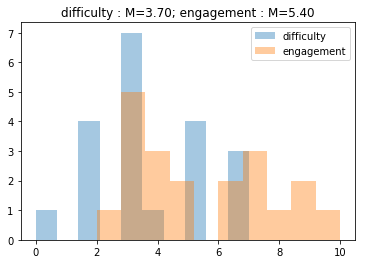

In [7]:
for question in ['difficulty','engagement']:
    
    print('%s : M=%0.2f' %(question, np.nanmean(np.array(actual_question[question],dtype=float))))
    plt.hist(np.array(actual_question[question],dtype=float),alpha=0.4,label=question)
    
plt.title('%s : M=%0.2f; %s : M=%0.2f' %('difficulty', 
                                 np.nanmean(np.array(actual_question['difficulty'],dtype=float)),
                                              'engagement', 
                                 np.nanmean(np.array(actual_question['engagement'],dtype=float))))
plt.legend()

In [8]:
print(np.array(actual_question['comments']))

[nan
 'The space bar and frame navigation failed sometimes during some of the tests. ( I am using brave browser). So I did the best I could to capture the event changes. Hope my data helps your research, regardless. :)'
 'Interested to know the outcome of the study.' nan
 "I wasn't sure what was defined as an 'event change'. " nan 'No'
 "I'm not sure that I totally understood the task. I hope I helped nonetheless."
 nan 'no' nan
 "I wasn't sure which 'events' were events. I'm not sure I counted some things as events so hopefully I still did what you needed me to."
 nan nan
 'I think, as its a computer study, it could have been easier to have click-able buttons for the event, pause, fast forward etc.'
 nan nan nan nan
 "I wasn't sure if the course of the video was right for some of them as I had moments where the ball took a while to appear on the screen etc. I judged the event changes as best as I could for these videos."]


In [9]:
idx_to_use=[]

for ppt in actual_question.index:
    idx_to_use.extend(np.where(trial_data[0]==ppt)[0])
    temp=[x for x in np.array(trial_data)[np.where(trial_data[0]==ppt)[0],3] if 'TrialName' in x]
    print('Num trials:',len(temp)/2)
    
actual_data=trial_data.iloc[idx_to_use,:]


Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0
Num trials: 32.0


In [12]:
for idx in actual_data.index:
    actual_data[3][idx]=json.loads(actual_data[3][idx])
    
actual_data.head()

np.save('eventseg_trialdata_dict',actual_data,allow_pickle=True)

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## Load in the data

In [5]:
actual_data=np.load('eventseg_trialdata_dict.npy',allow_pickle=True)

In [6]:
real_trials=[x for x in actual_data[:,3] if 'TrialName' in x]
real_trials=[x for x in real_trials if len(x['Boundaries']) >= 1 or len(x['Removed_Presses']) >= 1]
print(len(real_trials))

640


In [7]:
real_trials[:5]

[{'TrialName': 'falling_occlusion998_125ms_39.mp4',
  'Boundaries': ['4.69'],
  'Boundary_On_Pause': [1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 1},
 {'TrialName': 'containment_falling2998_125ms_38.mp4',
  'Boundaries': ['4.65'],
  'Boundary_On_Pause': [1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 3},
 {'TrialName': 'collision_containment5313_125ms_4.mp4',
  'Boundaries': ['2.70', '6.12', '8.07'],
  'Boundary_On_Pause': [1, 1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 5},
 {'TrialName': 'collision_collision312_125ms_63.mp4',
  'Boundaries': ['2.21', '4.74'],
  'Boundary_On_Pause': [1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 7},
 {'TrialName': 'occlusion_containment308_125ms_67.mp4',
  'Boundaries': ['6.85'],
  'Boundary_On_Pause': [1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 9}]

In [8]:
with open('boundary_dictionary.json') as f:
    boundary_info = json.load(f)
    
with open('length_dictionary.json') as f:
    length_info = json.load(f)

In [9]:
iti=200
boundary_info_sec={}
boundary_numbers=[]
for uv in boundary_info:
    locations=np.hstack(list(boundary_info[uv].values()))
    
    locations_ms=[i*iti/1000 for i in locations]
    boundary_info_sec[uv]=locations_ms
    
    boundary_numbers.append(len(locations))

In [10]:
locations

array([14, 20, 33])

In [11]:
# how I made the length_dictionary (had to do it outside of the notebook because I don't have ffprobe loaded)
#movie_folder='/gpfs/milgram/scratch/turk-browne/tsy6/physical_events/movies_est/'
#video_link=movie_folder+vid+'*'
#video_link
#duration = !ffprobe -v error -show_entries format=duration -of default=noprint_wrappers=1:nokey=1 {video_link}
#duration = 8.384000
#length_dict[vid] = duration

In [12]:
bin_size=5 # every 200 ms (1/5 = 0.200 seconds)
print('Binned every %0.2f seconds' % float(1/bin_size))

Binned every 0.20 seconds


collision_collision311
20
(53, 20)
Number of events: 1-6 (average=2.45)
collision_collision312
20
(63, 20)
Number of events: 1-10 (average=2.70)
collision_containment315
20
(71, 20)
Number of events: 1-7 (average=3.30)
collision_containment5313
20
(63, 20)
Number of events: 1-7 (average=3.55)
collision_falling998
20
(60, 20)
Number of events: 1-7 (average=3.60)
collision_falling3998
20
(42, 20)
Number of events: 1-6 (average=3.20)
collision_occlusion315
20
(53, 20)
Number of events: 1-4 (average=1.85)
collision_occlusion3311
20
(44, 20)
Number of events: 1-4 (average=2.30)
containment_collision308
20
(52, 20)
Number of events: 1-5 (average=2.00)
containment_collision314
20
(56, 20)
Number of events: 1-7 (average=2.25)
containment_containment319
20
(34, 20)
Number of events: 1-3 (average=1.45)
containment_containment4320
20
(70, 20)
Number of events: 1-5 (average=2.30)
containment_falling998
20
(43, 20)
Number of events: 1-4 (average=2.15)
containment_falling2998
20
(39, 20)
Number of e

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


falling_occlusion998
20
(36, 20)
Number of events: 1-4 (average=1.85)
falling_occlusion5998
20
(36, 20)
Number of events: 1-5 (average=2.10)
occlusion_collision4310
20
(51, 20)
Number of events: 1-4 (average=2.45)
occlusion_collision4311
20
(65, 20)
Number of events: 1-6 (average=2.25)
occlusion_containment308
20
(58, 20)
Number of events: 1-5 (average=2.40)
occlusion_containment312
20
(56, 20)
Number of events: 1-5 (average=2.55)
occlusion_falling998
20
(40, 20)
Number of events: 1-5 (average=2.05)
occlusion_falling2319
20
(57, 20)
Number of events: 1-4 (average=2.00)
occlusion_occlusion307
20
(47, 20)
Number of events: 0-4 (average=2.30)
occlusion_occlusion310
20
(42, 20)
Number of events: 1-5 (average=2.55)


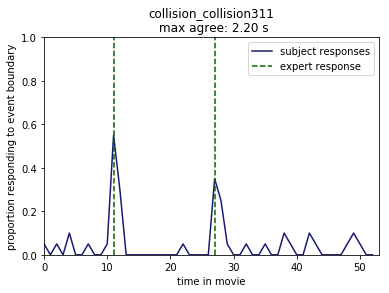

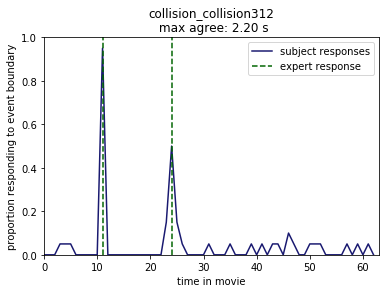

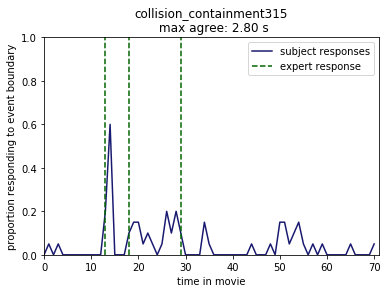

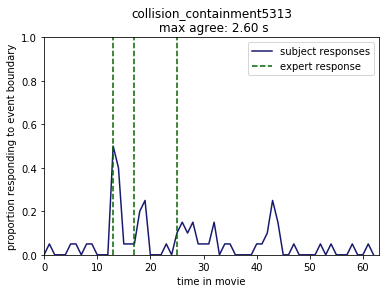

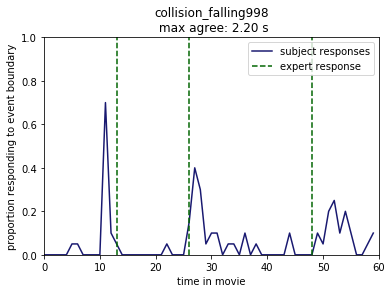

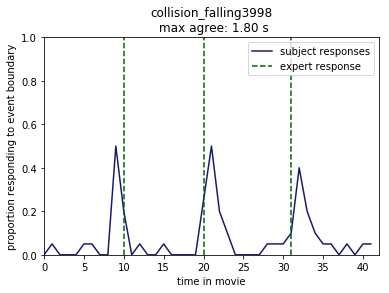

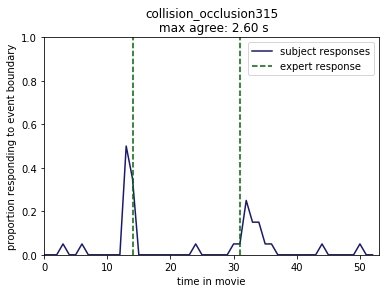

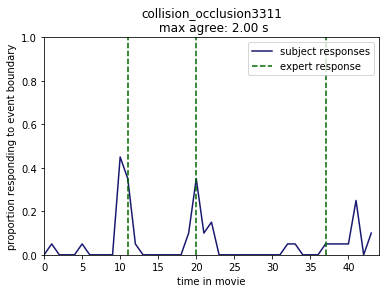

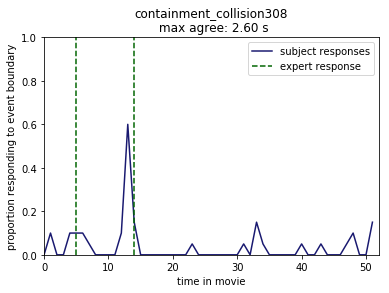

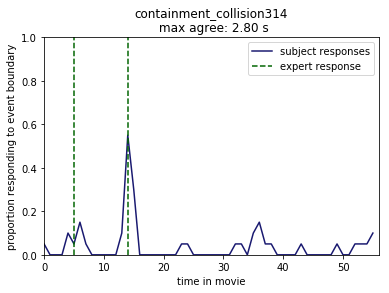

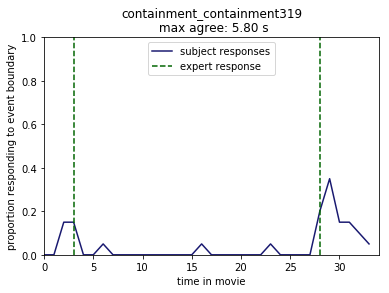

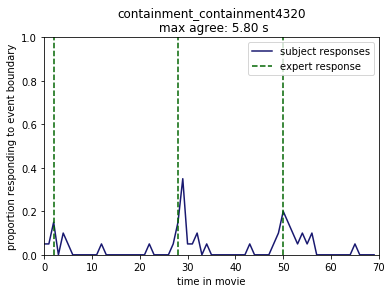

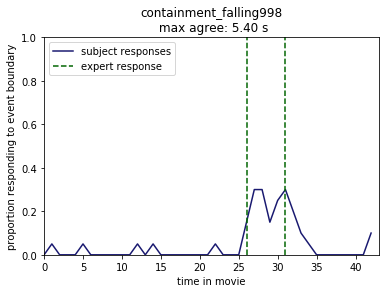

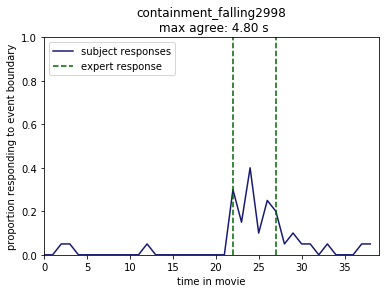

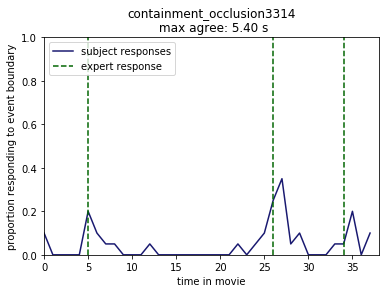

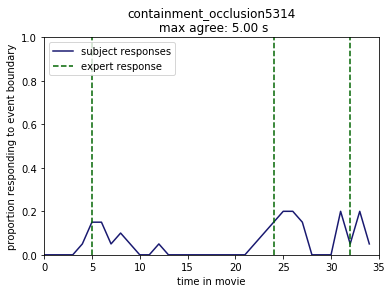

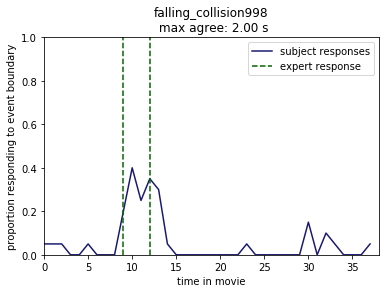

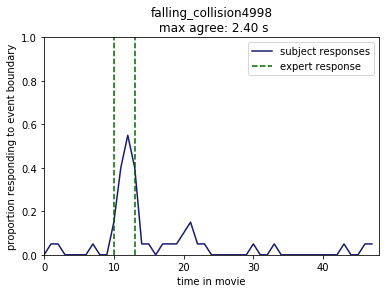

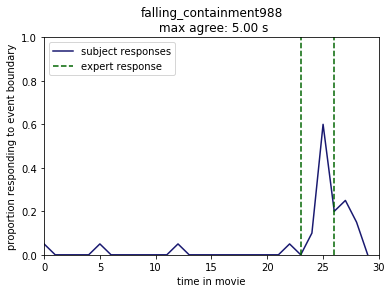

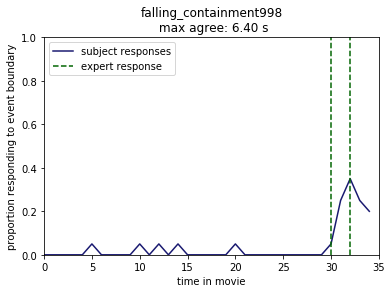

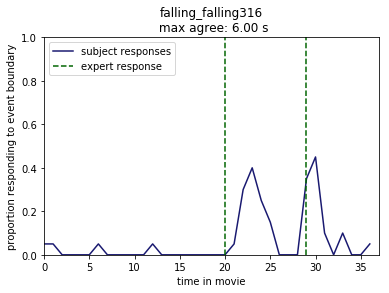

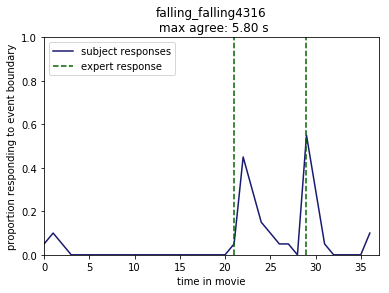

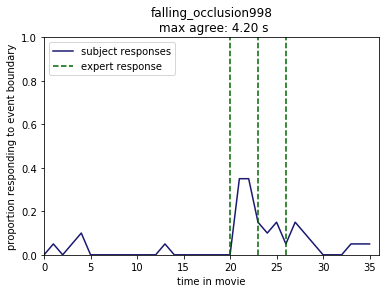

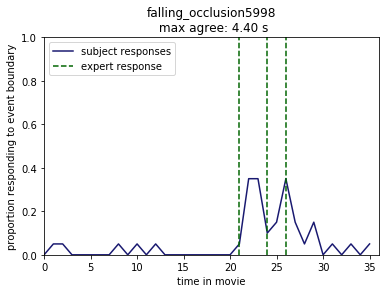

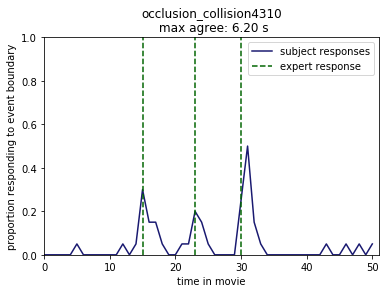

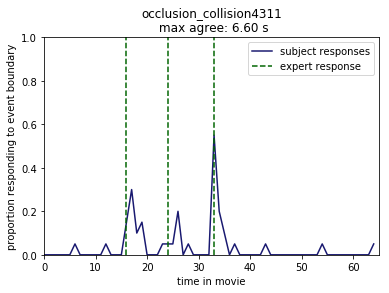

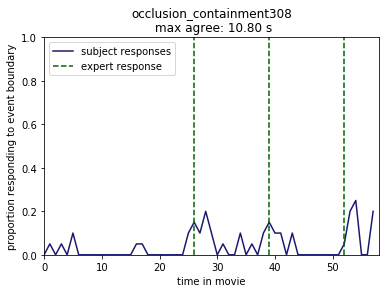

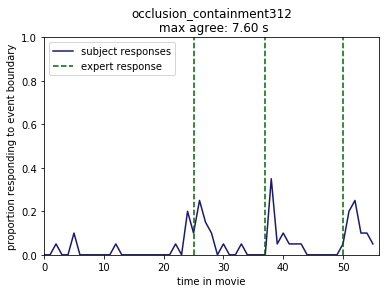

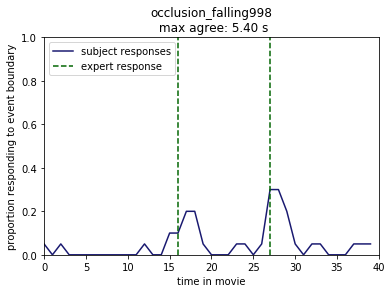

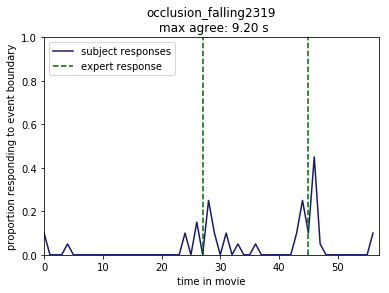

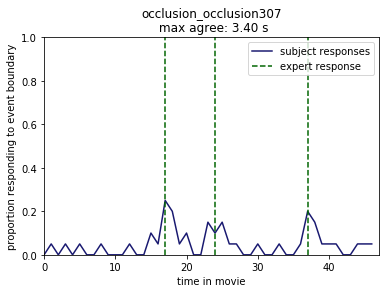

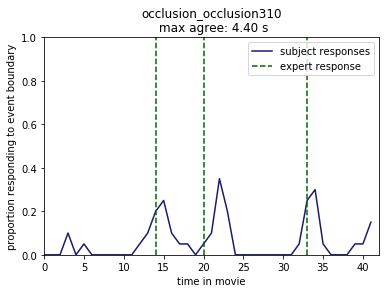

In [13]:
all_timecourses={}
percentages=[]
non_boundary_percentages=[]

all_numbers=[]
plot=True

max_agree_dict=dict()

for vid in boundary_info_sec:
    print(vid)
    
    sub_trials=[x for x in real_trials if vid in x['TrialName']]
    print(len(sub_trials))

    duration=length_info[vid]
    
    duration_resample=duration*bin_size 

    # create an aggregate matrix of responses 
    output = np.zeros((np.int(np.round(duration_resample)), len(sub_trials)))

    for counter, ppt in enumerate(sub_trials):
        rounded_vals =  np.round(np.array(ppt['Boundaries'],dtype=float),decimals=1)

        if sum(rounded_vals*bin_size >= np.int(np.round(duration_resample))) > 0: # if any were at the end of the movie, ignore
            idx=np.where(rounded_vals*bin_size >= np.int(np.round(duration_resample)))[0]
            rounded_vals=np.delete(rounded_vals,idx)

        indices = np.array(rounded_vals*bin_size,dtype=int)
        output[indices,counter] = 1
    print(output.shape)

    average_keypresses = output.sum(axis=1)
    num_events=output.sum(axis=0)
    print('Number of events: %d-%d (average=%0.2f)' %(np.min(num_events),
                                                                 np.max(num_events),np.nanmean(num_events)))
    all_numbers.append(num_events)
    expert_bounds=np.array(boundary_info_sec[vid])*bin_size
    non_expert_bounds=np.delete(np.arange(len(average_keypresses)),np.array(expert_bounds,int))
    
    # what was the most agreed upon? 
    max_agree=(np.argmax(average_keypresses/len(sub_trials)))/bin_size
    max_agree_dict[vid]=max_agree
    
    if plot == True:
        plt.figure()
        plt.plot(average_keypresses/len(sub_trials),color='midnightblue')
        plt.title('%s\n max agree: %0.2f s' %(vid,max_agree))
        plt.xlabel("time in movie")
        plt.ylabel("proportion responding to event boundary")
        plt.axis([0, len(average_keypresses), 0, 1])

        for b in expert_bounds:
            plt.axvline(b,color='darkgreen',linestyle='dashed')

        plt.legend(['subject responses','expert response'])

    
    all_timecourses[vid]=average_keypresses/len(sub_trials)
    percentages.extend(average_keypresses[np.array(expert_bounds,int)]/len(sub_trials))
    non_boundary_percentages.extend(average_keypresses[np.array(non_expert_bounds,int)]/len(sub_trials))
    
    

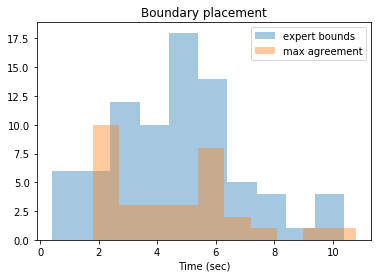

In [19]:
all_experts=[]
for i in boundary_info_sec.values():
    all_experts.extend(i)

fig=plt.figure()
plt.hist(all_experts,alpha=0.4,label='expert bounds')

plt.hist(max_agree_dict.values(),alpha=0.4,label='max agreement')
plt.title('Boundary placement')
plt.xlabel('Time (sec)')
plt.legend()
fig.savefig('pngs/exp1_eventseg/average_boundary_placement.png')

In [32]:
max_agree_dict

{'collision_collision311': 2.2,
 'collision_collision312': 2.2,
 'collision_containment315': 2.8,
 'collision_containment5313': 2.6,
 'collision_falling998': 2.2,
 'collision_falling3998': 1.8,
 'collision_occlusion315': 2.6,
 'collision_occlusion3311': 2.0,
 'containment_collision308': 2.6,
 'containment_collision314': 2.8,
 'containment_containment319': 5.8,
 'containment_containment4320': 5.8,
 'containment_falling998': 5.4,
 'containment_falling2998': 4.8,
 'containment_occlusion3314': 5.4,
 'containment_occlusion5314': 5.0,
 'falling_collision998': 2.0,
 'falling_collision4998': 2.4,
 'falling_containment988': 5.0,
 'falling_containment998': 6.4,
 'falling_falling316': 6.0,
 'falling_falling4316': 5.8,
 'falling_occlusion998': 4.2,
 'falling_occlusion5998': 4.4,
 'occlusion_collision4310': 6.2,
 'occlusion_collision4311': 6.6,
 'occlusion_containment308': 10.8,
 'occlusion_containment312': 7.6,
 'occlusion_falling998': 5.4,
 'occlusion_falling2319': 9.2,
 'occlusion_occlusion307':

In [33]:
print('Average number of key presses across all videos and participants:',
      np.sum(all_numbers)/(np.stack(all_numbers).shape[0]*np.stack(all_numbers).shape[1]))

Average number of key presses across all videos and participants: 2.3015625


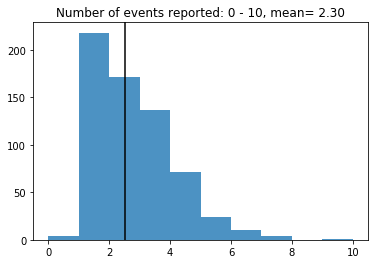

In [34]:
stacked=np.hstack(all_numbers)

fig=plt.figure()
plt.title('Number of events reported: %d - %d, mean= %0.02f' %(np.min(stacked),np.max(stacked),np.mean(stacked)))
plt.hist(stacked,alpha=0.8)
plt.axvline(np.mean(boundary_numbers),color='k')


fig.savefig('pngs/exp1_eventseg/events_reported.png')

(0.44238976805766295, 0.01123468751370418)


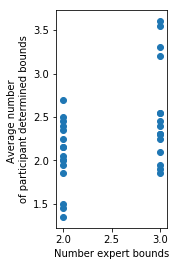

In [35]:
fig=plt.figure(figsize=(2,4))
plt.scatter(boundary_numbers,np.mean(all_numbers,axis=1))
plt.xlabel('Number expert bounds')
plt.ylabel('Average number \nof participant determined bounds')


fig.savefig('pngs/exp1_eventseg/expert_subject_events_reported.png')
print(stats.pearsonr(boundary_numbers,np.mean(all_numbers,axis=1)))

Boundaries; Mean percent overlap: 0.19624999999999998
pval vs 0: 1.2776133275639248e-16
Non-Boundaries; Mean percent overlap: 0.03999309868875087
pval vs 0: 9.925478924368066e-70
pval diff: 4.63760024722562e-50


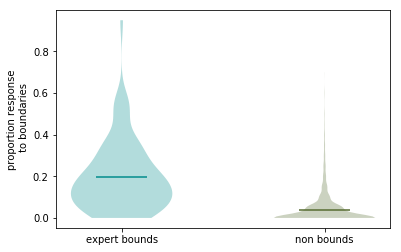

In [36]:

fig=plt.figure()
v=plt.violinplot(percentages,positions=[0],showextrema=False,showmeans=True)
v['bodies'][0].set_facecolor('darkcyan')
v['cmeans'].set_color('darkcyan')

v=plt.violinplot(non_boundary_percentages,positions=[1],showextrema=False,showmeans=True)
v['bodies'][0].set_facecolor('darkolivegreen')
v['cmeans'].set_color('darkolivegreen')

plt.xticks([0,1],['expert bounds','non bounds'])
plt.ylabel('proportion response\n to boundaries')

print('Boundaries; Mean percent overlap:',np.mean(percentages))
print('pval vs 0:',stats.ttest_1samp(percentages,0)[1])

print('Non-Boundaries; Mean percent overlap:',np.mean(non_boundary_percentages))
print('pval vs 0:',stats.ttest_1samp(non_boundary_percentages,0)[1])

print('pval diff:',stats.ttest_ind(percentages,non_boundary_percentages)[1])

fig.savefig('pngs/exp1_eventseg/proportion_responding_boundaries.png')

In [37]:
len(percentages)

80

In [38]:
len(non_boundary_percentages)

1449

## Compare to experiment 2 (temporal probes)

In [39]:
iti=200
countdown=3000

min_rt=300
max_rt=2500

In [40]:
exp2_data=np.load('trialdata_dict_110.npy',allow_pickle=True)

In [41]:
movie_loc='/gpfs/milgram/scratch/turk-browne/tsy6/physical_events/movies/'

In [42]:
for sub in np.unique(exp2_data[:,0]):
    sub_trials=exp2_data[exp2_data[:,0]==sub,3]
    #real_trials=[x for x in sub_trials if 'TrialName' in x]
    
    conf_vals=[]
    for trial in sub_trials:
        if 'TrialName' in trial:
            conf_vals.append(np.int(trial['Confidence']))
        else:
            conf_vals.append(np.nan)
    
    zscore_conf=(conf_vals-np.nanmean(conf_vals))/np.nanstd(conf_vals)

    for t, trial in enumerate(sub_trials):
        if 'TrialName' in trial:
            trial['Zscore_Conf']=zscore_conf[t]                     
                    
            
    exp2_data[exp2_data[:,0]==sub,3]=sub_trials

In [43]:
exp2_trials=[x for x in exp2_data[:,3] if 'TrialName' in x]
print(len(exp2_trials))

10560


In [44]:
remove_extra=1
restrict_rt=1

# set them all up together
names=[]
probe=[]
space_bars=[]
confidence=[]
confidence_z=[]
pixel_change=[]
rts=[]

extra_spaces=[]
outofrange_rt=[]

for trial in exp2_trials:
    
    probe_num=trial['TrialName'].split('_')[-1].split('.')[0]
    
    ignore_trial=False # preset
    
    
    if len(trial['Spacebar'])==0:
        space_timing=np.nan
        rt_val=np.nan
        
    elif len(trial['Spacebar'])>1:
        
        # do you want to remove the trials when the pressed the space bar multiple times? or just the first spacebar?
        if remove_extra==1: 
            rt_val=np.nan
            ignore_trial=True
            
        else: 
            space_timing=trial['Spacebar'][0]
            rt_val=(space_timing-countdown)-int(probe_num)*iti
        
        extra_spaces.append(trial['TrialName'])
        
    else:
        space_timing=trial['Spacebar'][0]
        rt_val=(space_timing-countdown)-int(probe_num)*iti
    
    if 'non-visible' in trial['TrialName']:
        probe_type = 0 # not a probe
        avg_pix_change=np.nan # no pixel change calculation here
        
    else:
        
        probe_type = 1 # yes it's a probe
        
        file='pixel_changes/'+trial['TrialName'].split('/')[0]+'_pixel_changes.json'
        with open(file) as f:
            video_dict=json.load(f)
        
        avg_pix_change=video_dict[movie_loc+trial['TrialName']]
        
        
    # remember the trials with out of range RTs
    if rt_val > max_rt or rt_val < min_rt:
        
        outofrange_rt.append(rt_val)
        
        if restrict_rt==1:
            ignore_trial=True
    
    # only save if the trial isn't bein excluded for some reason
    if ignore_trial==False:
        names.append(trial['TrialName'])
        probe.append(probe_type)
        space_bars.append(space_timing)
        confidence.append(np.int(trial['Confidence']))
        confidence_z.append(float(trial['Zscore_Conf']))
        pixel_change.append(avg_pix_change)
        rts.append(rt_val)    


names=np.array(names)
probe=np.array(probe)
space_bars=np.array(space_bars)
confidence=np.array(confidence)
confidence_z=np.array(confidence_z)
pixel_change=np.array(pixel_change)
rts=np.array(rts)

if remove_extra==1 and len(extra_spaces)>1:        
    print('*Ignoring %d trials (%0.2f percent) for multiple space bar presses' %(len(extra_spaces),len(extra_spaces)/len(real_trials)*100))
else:
    print('*Using the first space bar press for %d (%0.2f percent) trials for multiple space bar presses' %(len(extra_spaces),len(extra_spaces)/len(exp2_trials)*100))
    
if restrict_rt==1 and len(outofrange_rt)>1:    
    print('*Ignoring %d trials (%0.2f percent) for RTs that were out of range' %(len(outofrange_rt),len(outofrange_rt)/len(exp2_trials)*100))
else:
    print('*Including %d trials (%0.2f percent) with unexpected RTs' %(len(outofrange_rt),len(outofrange_rt)/len(exp2_trials)*100))    
    
print('Total number of trials used: %d (%0.2f percent)' %(len(names),len(names)/len(exp2_trials)*100))


*Ignoring 145 trials (22.66 percent) for multiple space bar presses
*Ignoring 946 trials (8.96 percent) for RTs that were out of range
Total number of trials used: 9469 (89.67 percent)


In [45]:
nonprobe_idxs=np.where(np.array(probe)==0)
probe_idxs=np.where(np.array(probe)==1)


detected=np.array(space_bars[probe_idxs])
detected[~np.isnan(detected)]=1
detected[np.isnan(detected)]=0

In [46]:
probes_num=[]

for i, probe in enumerate(names[probe_idxs]):
    base=probe.split('/')[0]
    probe_num=probe.split('_')[-1].split('.')[0]
    probes_num.append(probe_num)
    
probes_num=np.array(probes_num,dtype=int)      
probes_time=[i*iti/1000 for i in probes_num]

In [48]:
base_names=[i.split('/')[0] for i in names[probe_idxs]]
base_names[:5]

['collision_occlusion315',
 'collision_falling3998',
 'falling_occlusion5998',
 'collision_occlusion3311',
 'collision_falling998']

In [49]:

percentages_organized=np.zeros(len(probes_time))
for p in range(len(probes_time)):
    
    movie_length=length_info[base_names[p]]
    average_keypress=all_timecourses[base_names[p]]
    
    if probes_time[p]*bin_size >= np.int(np.round(movie_length)*bin_size): # if it was after the movie
        percentages_organized[p]=np.nan
    else:
        percentages_organized[p]=average_keypress[np.int(probes_time[p]*bin_size)]
    
    

In [50]:

percentages_organized=np.zeros(len(np.unique(names[probe_idxs])))
detected_organized= np.zeros(len(np.unique(names[probe_idxs])))

for p in range(len(np.unique(names[probe_idxs]))):
    
    indices=np.where(np.array(names[probe_idxs])==np.unique(names[probe_idxs])[p])[0]
    base_name=np.unique(names[probe_idxs])[p].split('/')[0]
    
    movie_length=length_info[base_name]
    average_keypress=all_timecourses[base_name]
    
    if probes_time[indices[0]]*bin_size >= np.int(np.round(movie_length)*bin_size): # if it was after the movie
        percentages_organized[p]=np.nan
    else:
        percentages_organized[p]=average_keypress[np.int(probes_time[indices[0]]*bin_size)]
        
    detected_organized[p]=np.mean(detected[indices])
    
    

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.4111163884430416, 5.243088653200181e-30)


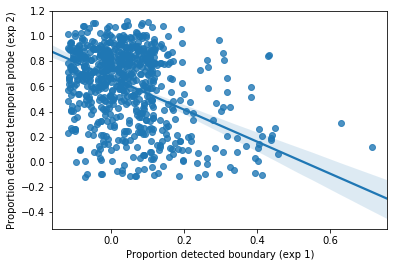

In [51]:
plt.figure()

mask=~np.isnan(percentages_organized)*~np.isnan(detected_organized)
sns.regplot(percentages_organized,detected_organized,x_jitter=0.12,y_jitter=0.12)
plt.xlabel('Proportion detected boundary (exp 1)')
plt.ylabel('Proportion detected temporal probe (exp 2)')
print(stats.pearsonr(percentages_organized[mask],detected_organized[mask]))

fig.savefig('pngs/exp1_eventseg/eventseg_corr_temporal_probe.png')